# Ford GoBike Bike-sharing System Usage Trend in February, 2019

## by Truc Phan

## Investigation Overview

Ford GoBike (now known as Bay Wheels) is the first regional and large-scale bicycle sharing system deployed in California's San Francisco Bay Area. The system was originally launched as Bay Area Bike Share in August 2013. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. As of January 2018, the Ford GoBike system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose with about 10,000 annual subscribers.

In this investigation, I will to look at the bike-sharing system usage pattern and trend in general as well as those patterns based on biker type and gender. The main focus was on trip duration, the time (weekday, hour), and the biker characteristics (i.e., age, gender and type).

## Dataset Overview

The dataset used for this study includes information about 180,000+ individual rides made in a bike-sharing system in February 2019 covering the greater San Francisco Bay area, raw data (without member information) also available in [here](https://s3.amazonaws.com/baywheels-data/index.html). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902_fordgobike_tripdata_clean.csv')

# Fix erroneous datatypes
df = df.astype({'start_station_id': 'object', 'end_station_id': 'object', 'bike_id': 'object', 
                'start_time':'datetime64[ns, UTC]', 'end_time':'datetime64[ns, UTC]',
                'user_type': 'category', 'member_gender':'category',
                'member_birth_year':'int64', 'member_age':'int64', 
                'start_hourofday': 'int64', 'duration_mins': 'float'})

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_cat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekday_cat)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172994 entries, 0 to 172993
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   duration_sec             172994 non-null  int64              
 1   start_time               172994 non-null  datetime64[ns, UTC]
 2   end_time                 172994 non-null  datetime64[ns, UTC]
 3   start_station_id         172994 non-null  object             
 4   start_station_name       172994 non-null  object             
 5   start_station_latitude   172994 non-null  float64            
 6   start_station_longitude  172994 non-null  float64            
 7   end_station_id           172994 non-null  object             
 8   end_station_name         172994 non-null  object             
 9   end_station_latitude     172994 non-null  float64            
 10  end_station_longitude    172994 non-null  float64            
 11  bike_id      

## Distribution of trip durations (in minutes):

The bike trip durations in the dataset originally has an issue with a right-skewed distribution as there are a wide range of duration values, from less than 1 minute to 1400+ minutes, with median at around 9 min and mean at around 12 min. The ourliers of durations more than 60 minutes were removed as 99% of the trips were less than 1 hour long. After outlier removal, the averager trip duration is 10 minutes. In addition, the log transformation of durations was conducted to produce the distribution of durations with a normally distributed bell-shape. Below is the log duration distribution plot.

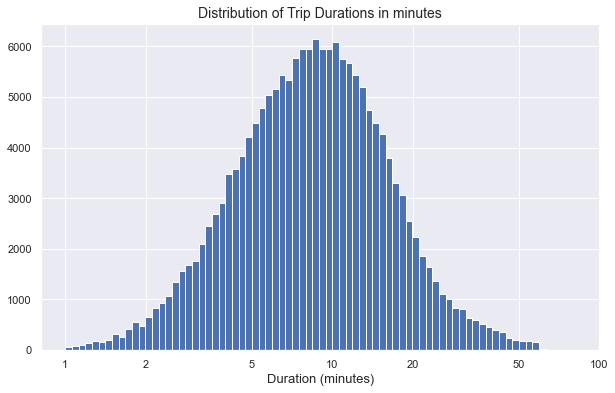

In [3]:
# There's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_mins'].max())+log_binsize, log_binsize)

# Setup graphic color and grid style
plt.rcParams['figure.figsize'] = 10,6
base_color = sb.color_palette('colorblind')[0]
sb.set_theme(style='darkgrid')

plt.figure(figsize=[10,6]);
plt.hist(data = df, x = 'duration_mins', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (minutes)', fontsize=13);
plt.title('Distribution of Trip Durations in minutes', fontsize=14);

## Trip distributions over hour-of-day and day-of-week

The trip distribution over day hours indicates two peak timeframes corresponding to typical rush hours: around 8:00 - 9:00 AM and 5:00 - 6:00 PM. According to the trip distribution over the day of week plot, most bike trips were taken on workdays (Monday - Friday), indicating primary bike usage is probably for short commuting within cities. Among weekdays, Thursday has the highest number of trips, followed by Tuesday ans Wednesday.

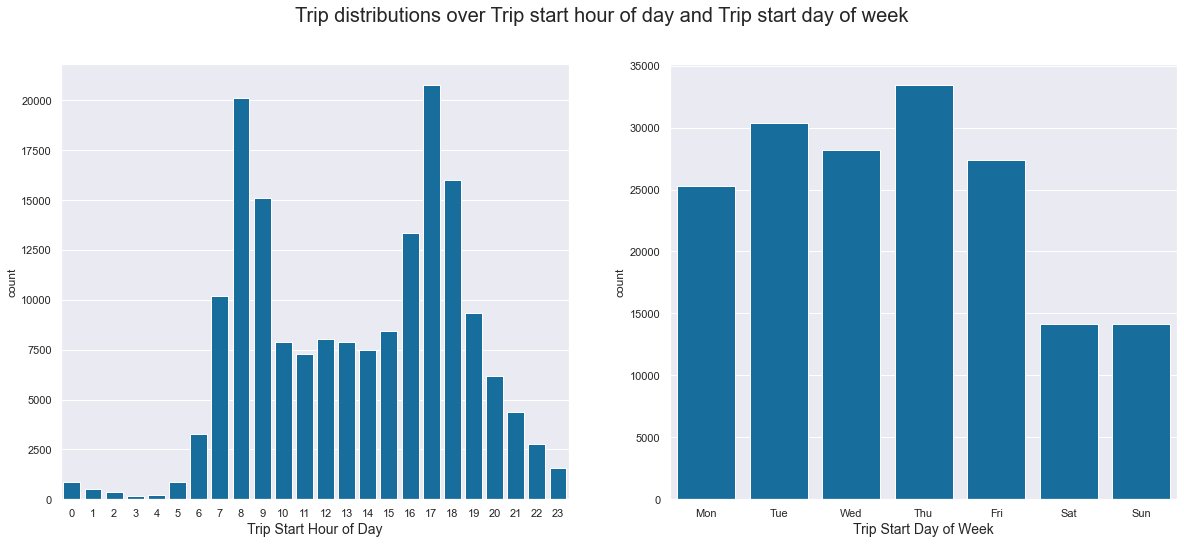

In [4]:
# let's plot these two together to get an idea of each category variable's distribution.
fig, ax = plt.subplots(ncols=2, figsize = [20,8])
plt.suptitle('Trip distributions over Trip start hour of day and Trip start day of week', fontsize=20);

sb.countplot(data = df, x = 'start_hourofday', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'start_dayofweek', color = base_color, ax = ax[1])

ax[0].set_xlabel("Trip Start Hour of Day", fontsize=14)
ax[1].set_xlabel("Trip Start Day of Week",fontsize=14 )
plt.show()

## User Types and User Genders

Subscribers made up the majority of the bike usage in February 2019, about 91%, while about 9% were consumed by casual cusomters. Almost 75% of the bike users are males, whereas females consists of only 23%. 

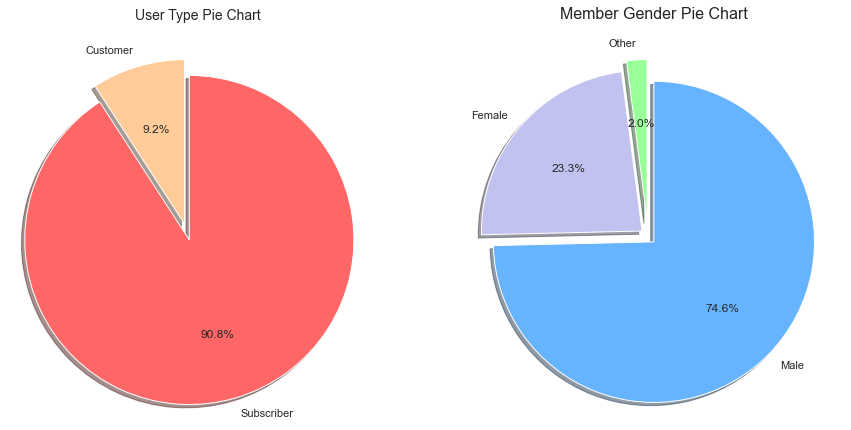

In [5]:
plt.figure(figsize=[15, 8]);

plt.subplot(1, 2, 1);
colors_type = ['#ff6666', '#ffcc99']
user_type_ratio = df.user_type.value_counts()/df.shape[0];
plt.pie(user_type_ratio, explode=[0, 0.1], labels=user_type_ratio.index, startangle=90, 
        colors= colors_type, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');
plt.title('User Type Pie Chart\n', fontsize=14);


plt.subplot(1, 2, 2);
colors_gender = [ '#66b3ff','#c2c2f0', '#99ff99']
gender_ratio = df.member_gender.value_counts()/df.shape[0];
plt.pie(gender_ratio, explode=[0.05, 0.05, 0.1], labels=gender_ratio.index, startangle=90,
        colors=colors_gender, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');
plt.title('Member Gender Pie Chart\n', fontsize=16);


## Hourly Usage during Weekdays for Customers and Subscribers

Moderate differences in usage patterns/habits between the two types of bike users can be observed from the heatmaps below. While subscribers use bikes mainly on workdays (Mondays - Fridays), customers use the system every day of the week and a lot more on weekends, especially in the afternoon from 1:00 PM to 4:00 PM. On weekdays, both subscribers and casual customers use bikes much more at around 8:00 - 9:00 AM and 5:00 - 6:00 PM as they all bike for the work commute. However, subscribers' usage around these rush hours is far more than casual customers' usage. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

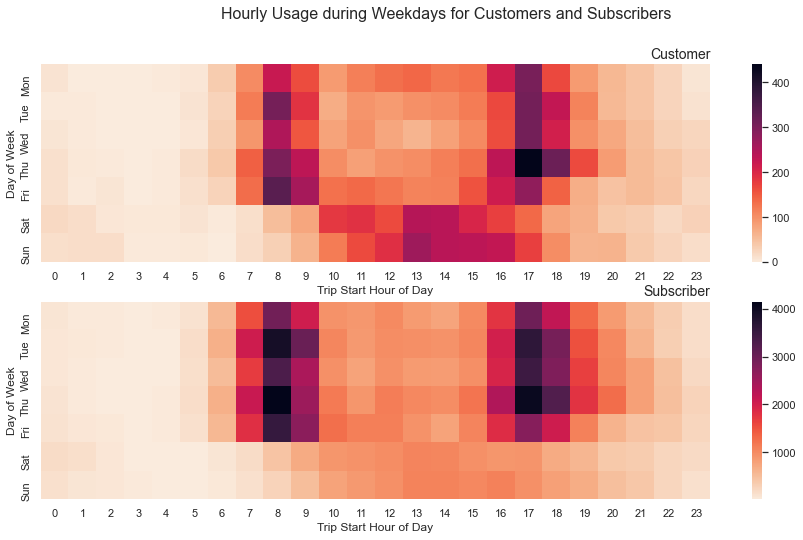

In [6]:
plt.figure(figsize=[15, 8]);
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=16);

plt.subplot(2, 1, 1);
customers = df.query('user_type == "Customer"');
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size();
ct_counts = ct_counts.reset_index(name='count');
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count');
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2);
subscribers = df.query('user_type == "Subscriber"');
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size();
st_counts = st_counts.reset_index(name='count');
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count');
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Day of Week');

plt.show();

## Average Weekday Trip Duration for Customers and Subscribers

According to the plot below, subscribers ride much shorter/quicker trips than casual customers every day of the week. Both user types have a noticeable increase in trip duration on Saturdays and Sundays, especially for casual riders. Subscribers' usage seems more efficient than customers overall and maintained a very consistent average duration Monday through Friday.



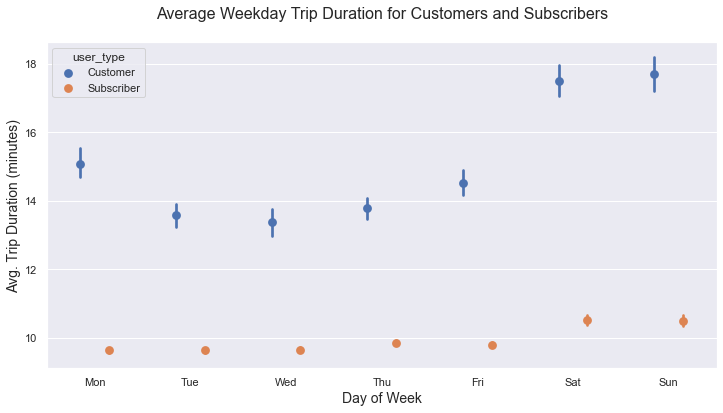

In [7]:
plt.figure(figsize = [12,6]);
sb.pointplot(data=df, x='start_dayofweek', y='duration_mins', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Avg. Trip Duration (minutes)', fontsize = 14)
plt.title('Average Weekday Trip Duration for Customers and Subscribers\n', fontsize = 16);

## Average Weekday Trip Duration for Males, Females and Others

Male users ride faster than females for the whole week, which is predictable. Not only faster, but male riders are also more consistent in the time of biking than females and others during Monday and Friday. The average trip duration of all member genders increases dramatically and varies more on weekends (i.e., Saturdays and Sundays) compared to other weekdays.

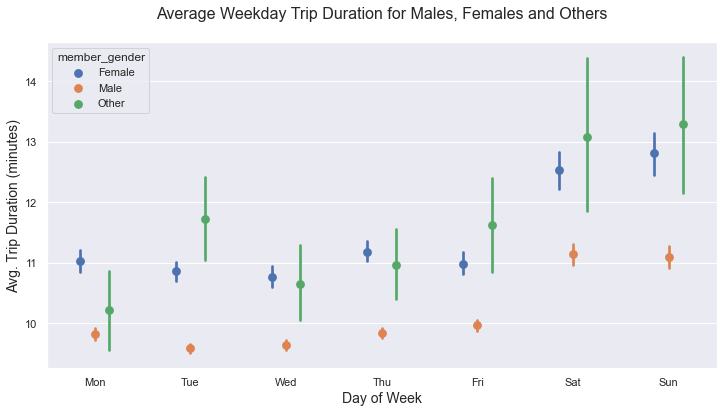

In [8]:
plt.figure(figsize = [12,6]);
sb.pointplot(data=df, x='start_dayofweek', y='duration_mins', hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Avg. Trip Duration (minutes)', fontsize = 14);
plt.title('Average Weekday Trip Duration for Males, Females and Others\n',  fontsize = 16);

## Summary

Overall, most bike trips were short, between 5 to 20 minutes, and more trips were taken on weekdays (Monday - Friday) than on weekends. In the Ford Gobike bike-sharing system in February 2019, there were many more subscribers than casual customers and much more males than females. Moderately different riding habits and usage patterns are noticeable between the two types of bike riders. While subscribers rode mainly on workdays (Mondays - Fridays), customers also utilized the system on weekends, especially in the afternoon. On weekdays, the bike usage of both subscribers and casual customers increased significantly around 8:00 - 9:00 AM and 5:00 - 6:00 PM as they all biked for the work commute. However, subscribers' usage around these rush hours is far more than casual customers' usage. In addition, subscribers tended to have much shorter/quicker trips than customers, making subscriber usage more efficient. Finally, male riders biked faster and with the more consistent trip length in comparison to female riders.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > jupyter nbconvert fordgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt